In [23]:
import tables
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = np.zeros((30,0))
vertex = np.zeros((3,0))
for i in np.arange(500):
    h = tables.open_file('file%d.h5' % (i+1))
    if(np.size(h.root.mean)/30 == np.size(h.root.vertex[:])/3):
        data = np.hstack((data, h.root.mean[:].T))
        vertex = np.hstack((vertex, h.root.vertex[:].T))
    else:
        print(i+1)
    h.close()
    
vertex = vertex.T
data = data.T

60
143
209
277
325
349
375
472
489


In [71]:
v = np.zeros_like(vertex)
v[:,0] = np.sqrt(np.sum(vertex**2,axis=1))/1000
v[:,1] = np.arccos(vertex[:,2]/1000/(v[:,0]+1e-6))
v[:,2] = np.arctan(vertex[:,1]/(vertex[:,0]+1e-6)) + (vertex[:,0]<0)*np.pi

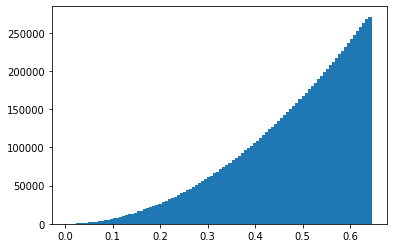

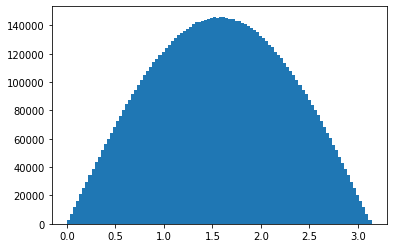

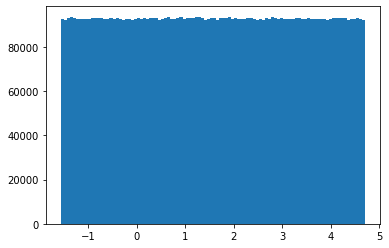

In [72]:
plt.hist(v[:,0], bins = 100)
plt.show()
plt.hist(v[:,1], bins = 100)
plt.show()
plt.hist(v[:,2], bins = 100)
plt.show()

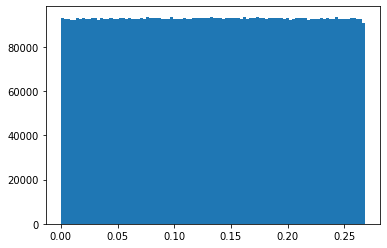

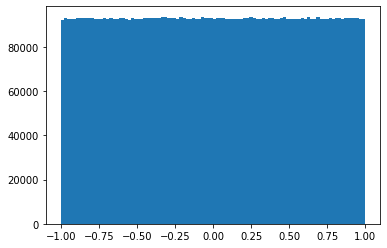

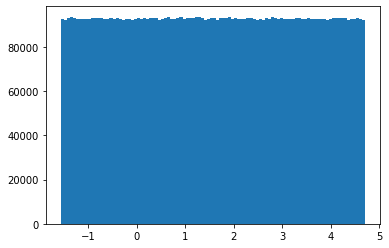

In [73]:
plt.hist(v[:,0]**3, bins = 100)
plt.show()
plt.hist(np.cos(v[:,1]), bins = 100)
plt.show()
plt.hist(v[:,2], bins = 100)
plt.show()

In [74]:
N = 30
H_r, edges_r = np.histogram(v[:,0]**3, bins = N)
H_t, edges_t = np.histogram(np.cos(v[:,1]), bins = N)
H_p, edges_p = np.histogram(v[:,2], bins = N)

In [76]:
bins = np.zeros((N**3, 3))
mean = np.zeros((N**3, 30))
cnt = 0
for i1, i in enumerate(edges_r[0:-1]):
    for j1, j in enumerate(edges_t[0:-1]):
        for k1, k in enumerate(edges_p[0:-1]):
            bins[cnt:] = np.array((i,j,k))
            cnt = cnt + 1
            index = (v[:,0]**3>edges_r[i1]) & (v[:,0]**3<edges_r[i1+1]) & \
                (np.cos(v[:,1])>edges_t[j1]) & (np.cos(v[:,1])<edges_t[j1+1]) & \
                (v[:,2]>edges_p[k1]) & (v[:,2]<edges_p[k1+1])
            mean[cnt,:] = np.mean(data[index],axis=0)

KeyboardInterrupt: 

In [66]:
print(data.shape)
print(vertex.shape)
print(v.shape)

(30, 9467432)
(9467772, 3)
(9467772, 3)


In [90]:
pe = 0
N = 0
for i in np.arange(50):
    h = tables.open_file('hist%d.h5' % (i+1))
    
    mean = h.root.mean[:]
    vertex = h.root.vertex[:]
    
    pe = pe + mean[:,0:-1]
    N = N + mean[:,-1]
    h.close()
    
total = (pe.T/N).T
print(total.shape)

with h5py.File('total.h5','w') as out:   
    out.create_dataset('mean', data = total)
    out.create_dataset('vertex', data = vertex)

(27000, 30)


[[1.81578947 1.96783626 2.01169591 ... 2.35087719 2.35964912 2.6754386 ]
 [1.88059701 1.81791045 1.84179104 ... 2.35223881 2.29850746 2.68955224]
 [1.83183183 1.84384384 1.85885886 ... 2.77477477 2.34534535 2.71471471]
 ...
 [0.18209877 0.58641975 1.2962963  ... 0.95061728 0.89506173 1.17592593]
 [0.15506329 1.31962025 1.29746835 ... 0.91139241 0.83227848 1.11075949]
 [0.16052632 2.73157895 1.16842105 ... 0.85526316 0.88157895 1.04736842]]


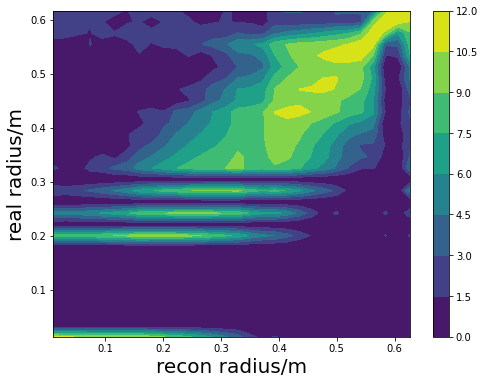

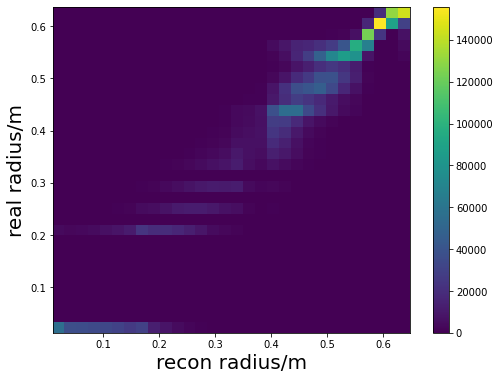

In [153]:
import tables
import numpy as np
import h5py

r1 = np.arange(0.01, 0.40, 0.01)
r2 = np.arange(0.40, 0.65, 0.002)
r = np.hstack((r1,r2))
ra = []
data = []
for radius in r:
    h1 = tables.open_file("./MCmean/file%.3f.h5" % radius)
    try:
        a = h1.root.result[:]
        data.append(a)
        ra.append(radius)
    except:
        print(radius)
        pass
    h1.close()

real = []
recon = np.zeros((3,0))
for index, x in enumerate(ra):
    real = np.hstack((real, ra[index] * np.ones(np.size(data[index][:,0]))))
    recon = np.hstack((recon, data[index].T))
    
import matplotlib.pyplot as plt

H, xedges, yedges = np.histogram2d(real, recon[0,:], bins=30)
plt.figure(figsize=(8,6))
plt.contourf(xedges[0:-1], yedges[0:-1], np.log(np.nan_to_num(H)+1).T)
plt.xlabel('recon radius/m',fontsize=20)
plt.ylabel('real radius/m', fontsize=20)
plt.colorbar()
plt.show()
plt.figure(figsize=(8,6))
plt.hist2d(real, recon[0,:], bins=30)
plt.xlabel('recon radius/m',fontsize=20)
plt.ylabel('real radius/m', fontsize=20)
plt.colorbar()
plt.show()

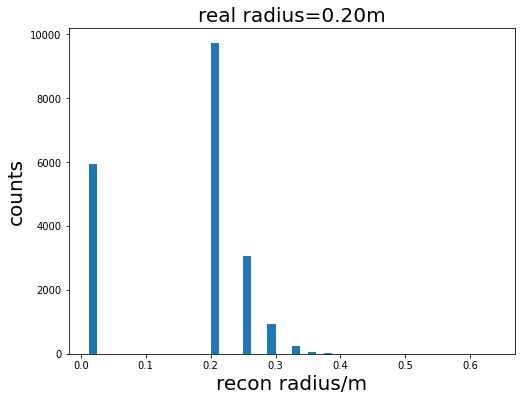

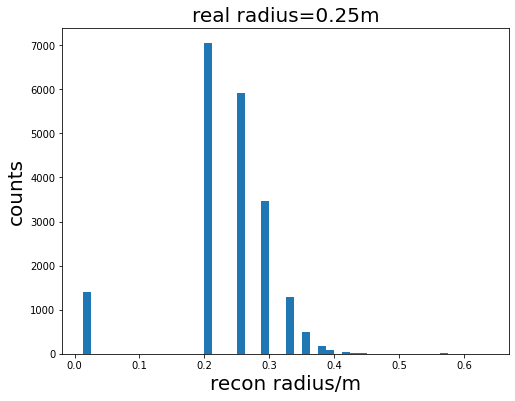

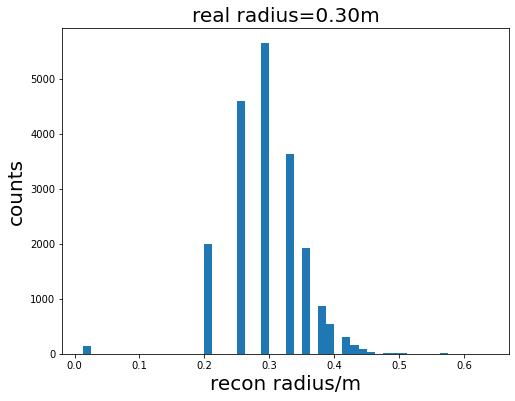

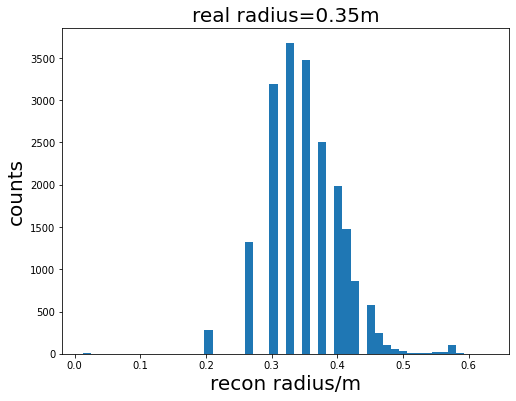

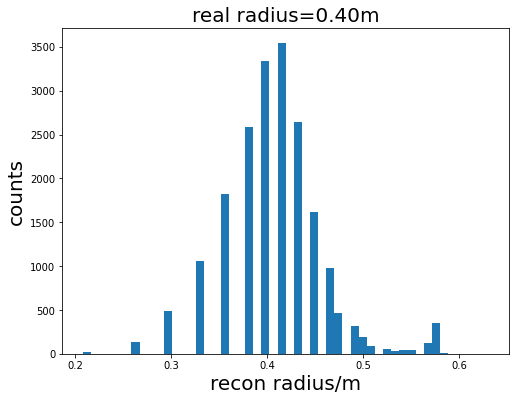

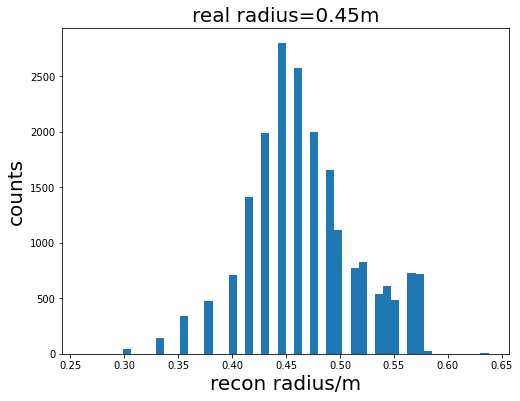

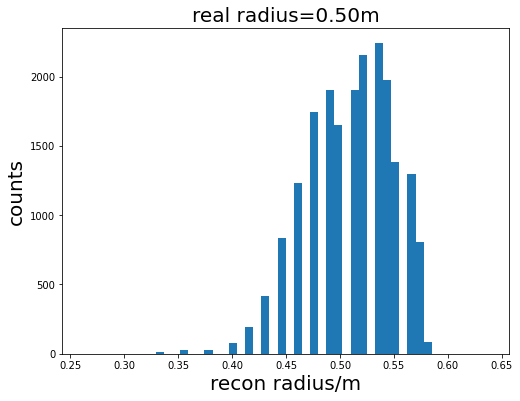

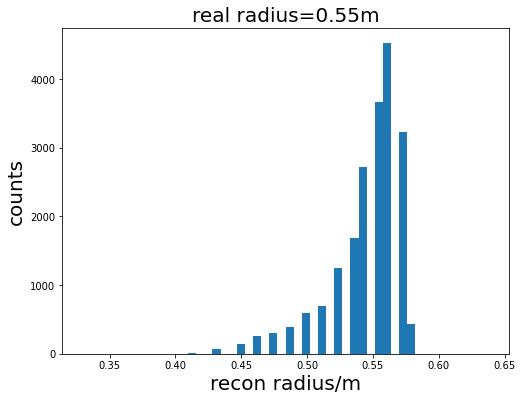

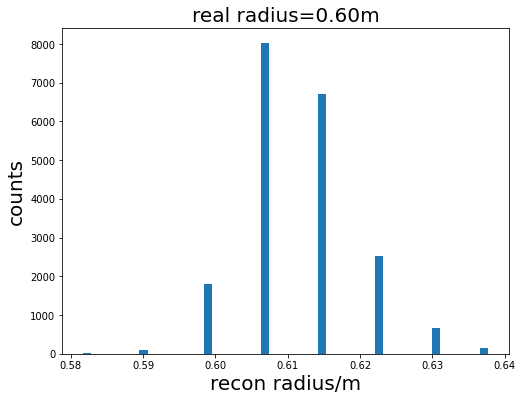

In [181]:
for i in np.arange(0.2,0.65,0.05):

    index = np.where((r-i)==np.min(np.abs(r-i)))
    plt.figure(figsize=(8, 6))
    plt.hist(data[index[0][0]][:,0],bins=50)
    plt.title('real radius=%.2fm' % i, fontsize=20)
    plt.xlabel('recon radius/m', fontsize=20)
    plt.ylabel('counts', fontsize=20)
    plt.show()


In [173]:
index[0]

array([19])